El tamaño de la imagen es: 256x255


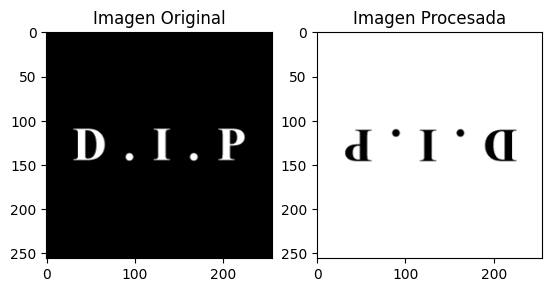

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def process_image(image):
    image = image.astype(np.float32)
    rows, cols = image.shape
    print(f"El tamaño de la imagen es: {rows}x{cols}")

    # 1: i(x, y) * (-1)^(x+y) -> i1(x, y)
    for x in range(rows):
        for y in range(cols):
            image[x,y] = image[x,y] * (-1)**(x+y)

    # 2: DFT -> I1(u, v)
    dft = np.fft.fft2(image)

    # 3: Conj -> I2(u, v) = I1(u, v)*
    dft_conj = np.conj(dft)

    # 4: IDFT -> i2(x, y)
    idft = np.fft.ifft2(dft_conj)

    # 5: i2(x, y) * (-1)^(x+y) = i'(x, y)
    for x in range(rows):
        for y in range(cols):
            idft[x,y] = idft[x,y] * (-1)**(x+y)

    return np.real(idft)

img_src = Image.open('./EJ7/DIPimage2.jpg').convert('L')
img = np.array(img_src)
processed_img = process_image(img)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Source Image')
plt.subplot(122), plt.imshow(processed_img, cmap='gray'), plt.title('Processed Image')
plt.show()


# Ejercicio 7
## Desarrollo
### 1: Multiplicacion
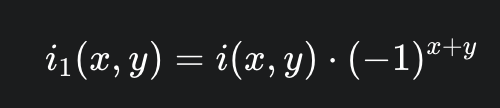

Logrando un corrimiento o centrado de la componente continua al centro del espectro de fourier

### 2: Transformada Discreta 
Considerando una imagen de tamaño NxM y en base a lo mencionado en (1) obtenemos I1(u, v)

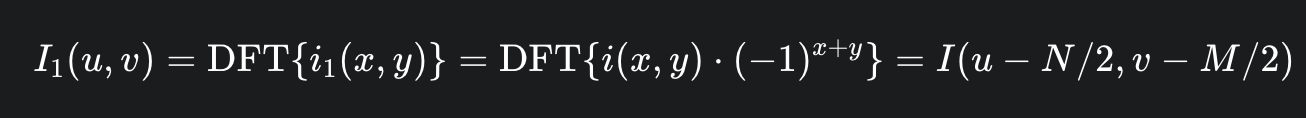

### 3: Conjugado
Aplicando el conjugado de I1, obtenemos I2

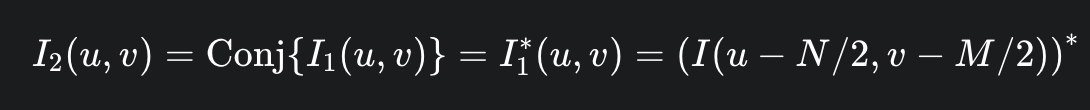

### 4: Transformada Discreta Inversa
Utilizando la propiedad de simetria de la DFT/IDFT

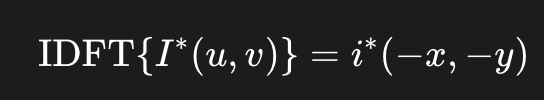

En nuestro caso, con la DFT conjugada de una version desplazada podemos obtener i2

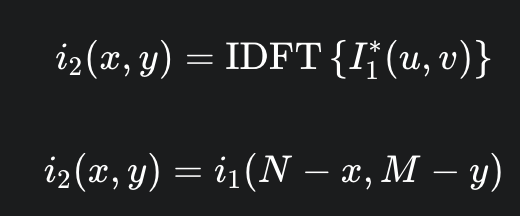

### 5: Multiplicacion
Con la ultima multiplicacion obtenemos i'(x, y)

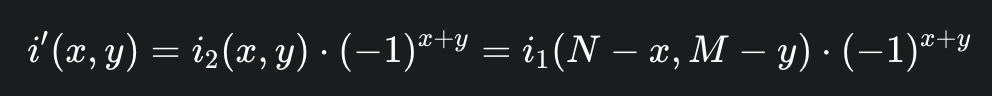

Sustituyendo i1:

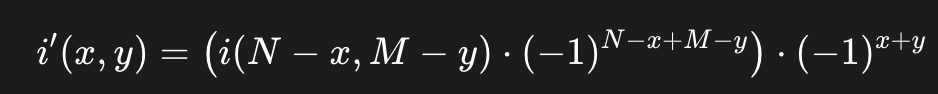

Simplificando los exponentes de (-1) obtenemos la expresion final

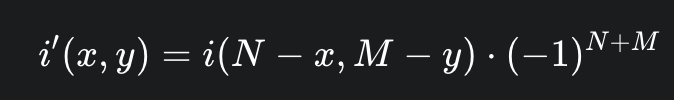

## Conclusiones
Para finalizar el analisis podemos separar al sistema en 2 partes: rotacion + inversion
### 1. Rotacion
El bloque de {DFT -> Conj -> IDFT} se encarga de rotar la imagen 180º, ya que realiza una inversion de la imagen sobre ambos ejes.
### 2. Inversion
Por otro lado, la mutiplicacion por (-1)^(x+y) puede generar una inversion de signo dependiendo del tamaño de la imagen. Como podemos ver en la expresión final de i'(x, y), el producto por (-1)^(N+M) generara una inversion de signo cuando el termino N+M sea impar. Esto podemos observarlo con las imagenes 2 y 3 dentro la carpeta EJ7 ya que tienen un tamaño de 255x256 y 256x255.